2025-02-12 07:30:22,932 - 2877671922.py - <module> - INFO - Dataset loaded successfully.


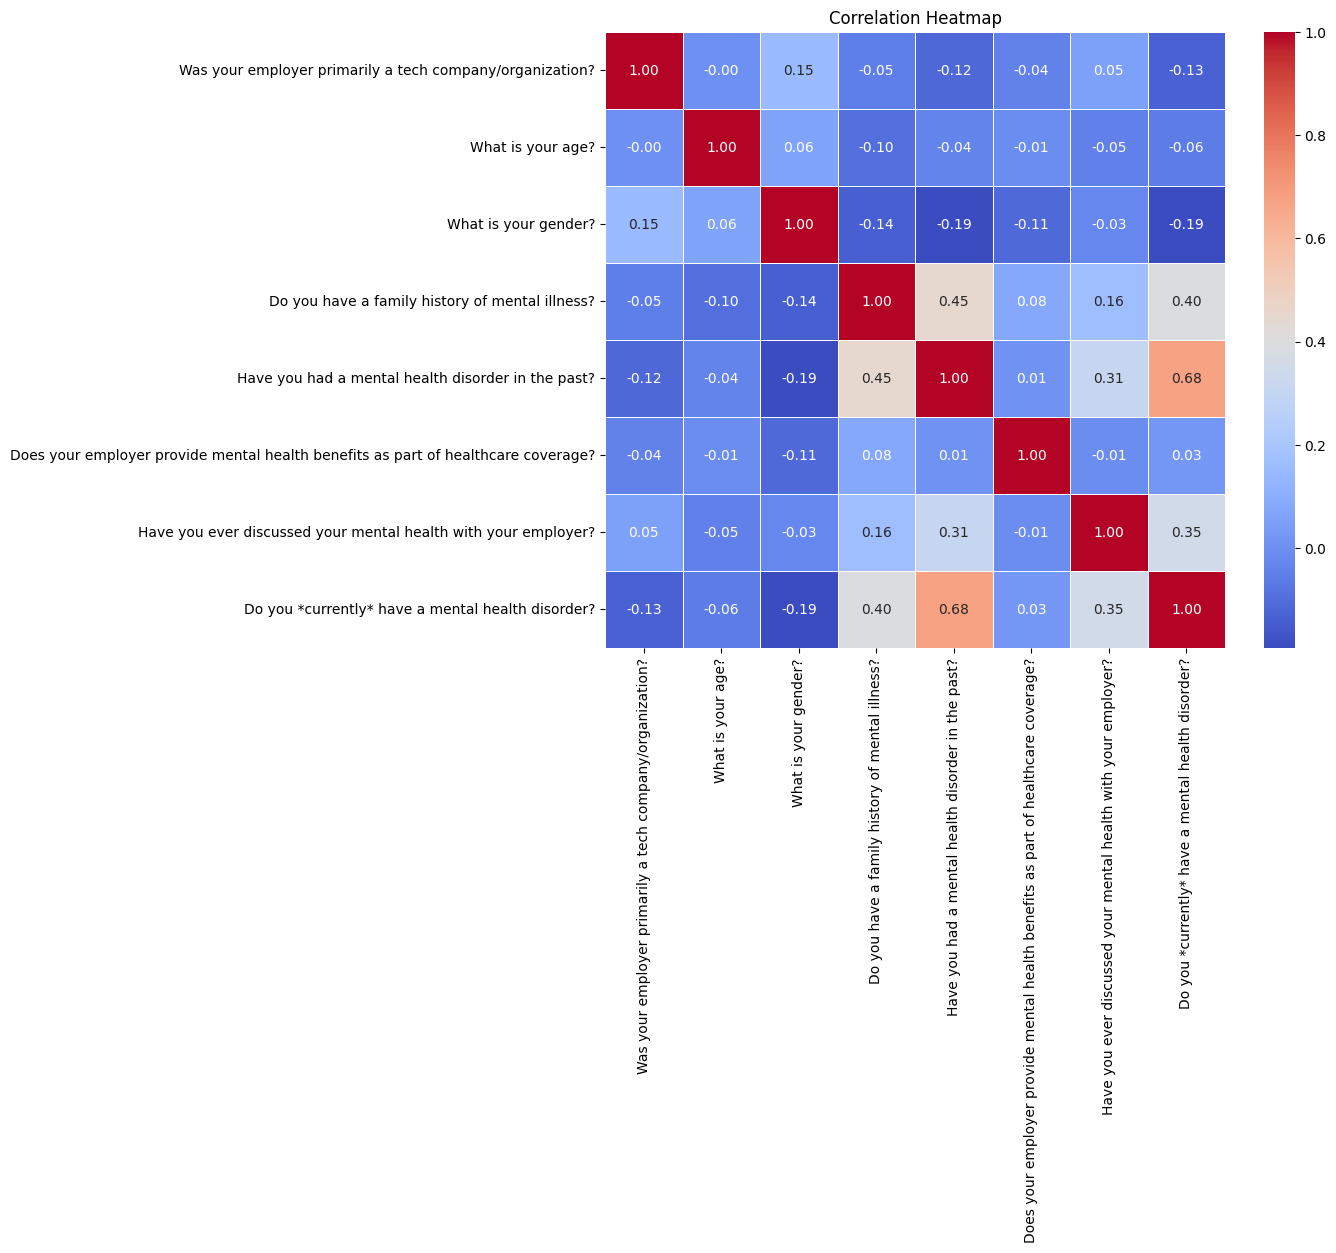

In [ ]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from logger import logger  
import logging
# Set the logger for Matplotlib to ignore debug logs
logging.getLogger('matplotlib').setLevel(logging.WARNING)
try:
    # Load the cleaned dataset
    df = pd.read_csv('../Data/final_cleaned_data.csv')
    logger.info("Dataset loaded successfully.")
except Exception as e:
    logger.error(f"Error loading the dataset: {e}")
    raise  # Stop execution if data loading fails

try:
    df_numeric = df.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns
except Exception as e:
    logger.error(f"Error filtering numeric columns: {e}")
    raise  

try:
    correlation_matrix = df_numeric.corr()
except Exception as e:
    logger.error(f"Error calculating the correlation matrix: {e}")
    raise  

try:
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
except Exception as e:
    logger.error(f"Error plotting the heatmap: {e}")
    raise  


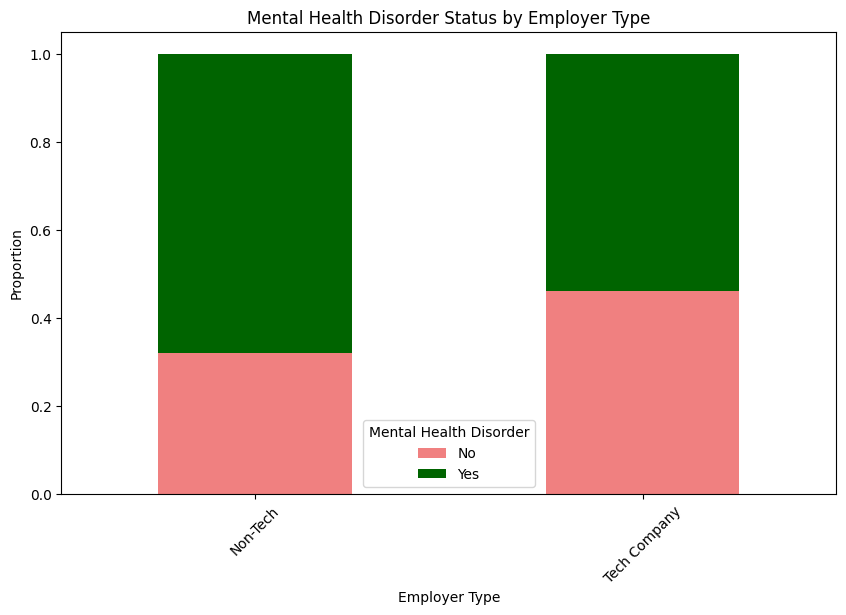

2025-02-12 07:32:20,604 - 217266970.py - <module> - INFO - Plot generated successfully.


In [5]:
try:
    # Group by employer type and analyze mental health status
    employer_health = df.groupby(
        'Was your employer primarily a tech company/organization?'
    )['Do you *currently* have a mental health disorder?'].value_counts(normalize=True).unstack()
    # Map employer type and mental health status
    employer_health.index = employer_health.index.map({0: 'Non-Tech', 1: 'Tech Company'})  
    employer_health.columns = employer_health.columns.map({0: 'No', 1: 'Yes'})  
    color_map = {"Yes": "darkgreen", "No": "lightcoral"}
    try:
        employer_health.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map['No'], color_map['Yes']])
        plt.title('Mental Health Disorder Status by Employer Type')
        plt.xlabel('Employer Type')
        plt.ylabel('Proportion')
        plt.legend(title='Mental Health Disorder', labels=['No', 'Yes'])
        plt.xticks(rotation=45)
        plt.show()
        logger.info("Plot generated successfully.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")
        pass  
except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")

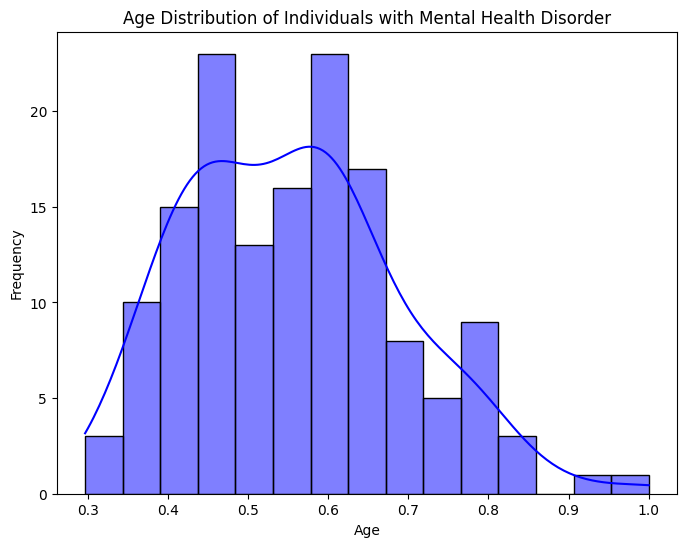

2025-02-12 07:35:29,835 - 4017762564.py - <module> - INFO - Age distribution plot generated successfully.


In [6]:
try:
    # Filter individuals with mental health disorders
    mental_health_df = df[df['Do you *currently* have a mental health disorder?'] == 1]
    try:
        plt.figure(figsize=(8, 6))
        sns.histplot(mental_health_df['What is your age?'], kde=True, color='blue', bins=15)
        plt.title('Age Distribution of Individuals with Mental Health Disorder')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()
        logger.info("Age distribution plot generated successfully.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")
        pass  

except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")



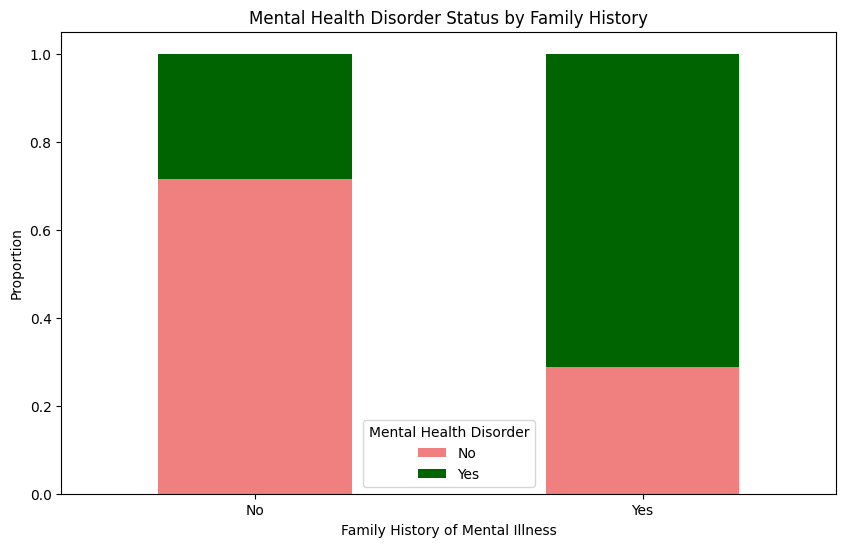

2025-02-12 05:05:59,750 - 2880077221.py - <module> - INFO - Successfully generated the family history vs. mental health disorder plot.


In [ ]:
try:
    # Analyze relationship between family history of mental illness and current mental health status
    family_history_health = df.groupby('Do you have a family history of mental illness?')[
        'Do you *currently* have a mental health disorder?'
    ].value_counts(normalize=True).unstack()
    
    # Map column and index values for clarity in the label names
    family_history_health.columns = family_history_health.columns.map({0: 'No', 1: 'Yes'})
    family_history_health.index = family_history_health.index.map({0: 'No', 1: 'Yes'})
    # Plot 
    try:
        family_history_health.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map['No'], color_map['Yes']])
        plt.title('Mental Health Disorder Status by Family History')
        plt.xlabel('Family History of Mental Illness')
        plt.ylabel('Proportion')
        plt.legend(title='Mental Health Disorder', labels=['No', 'Yes'])
        plt.xticks(rotation=0)
        plt.show()
        logger.info("Successfully generated the family history vs. mental health disorder plot.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")

except KeyError as ke:
    logger.error(f"Missing expected column in dataset: {ke}")
except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")


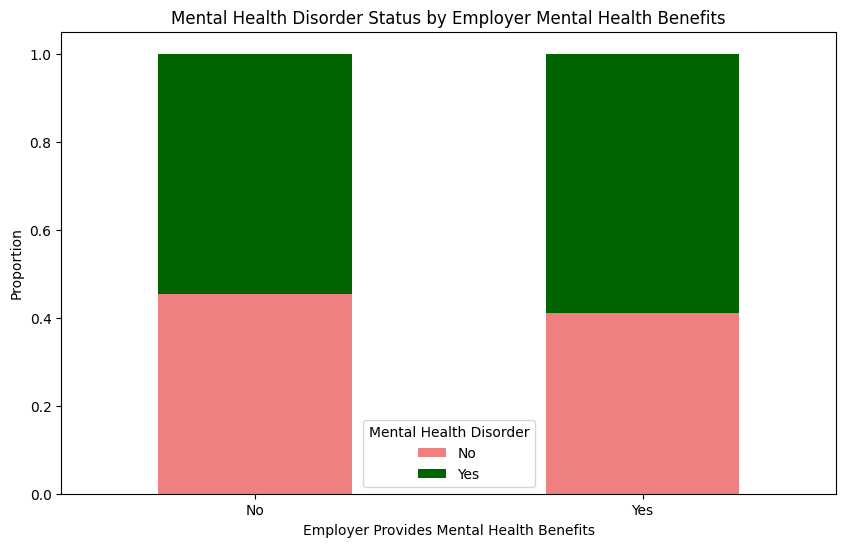

2025-02-12 05:08:11,464 - 2309681577.py - <module> - INFO - Successfully generated the employer benefits vs. mental health disorder plot.


In [ ]:
try:
    # Analyze employer mental health benefits and its impact on mental health status
    benefits_health = df.groupby('Does your employer provide mental health benefits as part of healthcare coverage?')[
        'Do you *currently* have a mental health disorder?'
    ].value_counts(normalize=True).unstack()

    # Map column and index values for clarity
    benefits_health.columns = benefits_health.columns.map({0: 'No', 1: 'Yes'})
    benefits_health.index = benefits_health.index.map({0: 'No', 1: 'Yes'})
    try:
        benefits_health.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map['No'], color_map['Yes']])
        plt.title('Mental Health Disorder Status by Employer Mental Health Benefits')
        plt.xlabel('Employer Provides Mental Health Benefits')
        plt.ylabel('Proportion')
        plt.legend(title='Mental Health Disorder', labels=['No', 'Yes'])
        plt.xticks(rotation=0)
        plt.show()
        logger.info("Successfully generated the employer benefits vs. mental health disorder plot.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")

except KeyError as ke:
    logger.error(f"Missing expected column in dataset: {ke}")
except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")



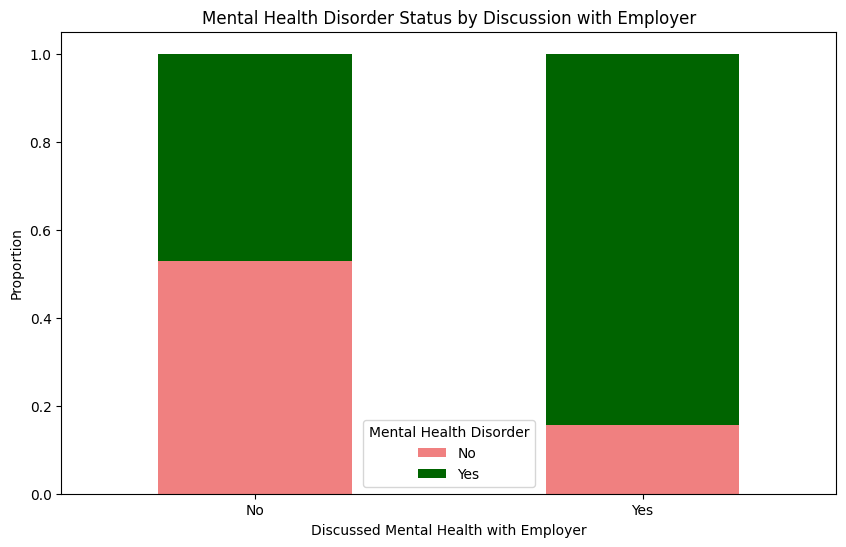

2025-02-12 05:09:31,439 - 3848934172.py - <module> - INFO - Successfully generated the discussion vs. mental health disorder plot.


In [ ]:
try:
    # Analyze the relationship between discussing mental health with an employer and having a mental health disorder
    discussion_health = df.groupby('Have you ever discussed your mental health with your employer?')[
        'Do you *currently* have a mental health disorder?'
    ].value_counts(normalize=True).unstack()

    # Map column and index values for clarity to display
    discussion_health.columns = discussion_health.columns.map({0: 'No', 1: 'Yes'})
    discussion_health.index = discussion_health.index.map({0: 'No', 1: 'Yes'})
    try:
        discussion_health.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map['No'], color_map['Yes']])
        plt.title('Mental Health Disorder Status by Discussion with Employer')
        plt.xlabel('Discussed Mental Health with Employer')
        plt.ylabel('Proportion')
        plt.legend(title='Mental Health Disorder', labels=['No', 'Yes'])
        plt.xticks(rotation=0)
        plt.show()
        logger.info("Successfully generated the discussion vs. mental health disorder plot.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")

except KeyError as ke:
    logger.error(f"Missing expected column in dataset: {ke}")
except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")

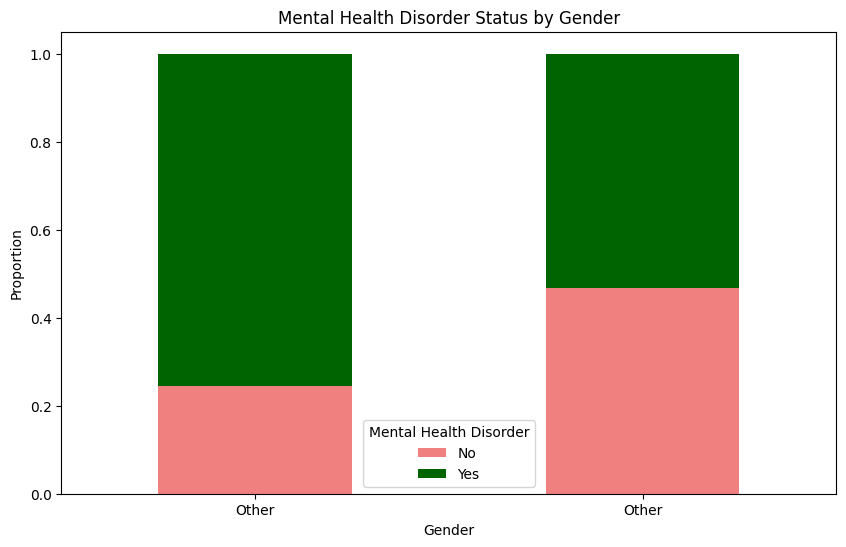

2025-02-12 05:10:59,946 - 1232022639.py - <module> - INFO - Successfully generated the gender vs. mental health disorder plot.


In [ ]:
try:
    # Analyze the relationship between gender and mental health disorder status
    gender_health = df.groupby('What is your gender?')[
        'Do you *currently* have a mental health disorder?'
    ].value_counts(normalize=True).unstack()

    # Map column and index values for clarity
    gender_health.columns = gender_health.columns.map({0: 'No', 1: 'Yes'})
    gender_map = {'Female': 'Female', 'Male': 'Male'}
    gender_health.index = gender_health.index.map(lambda x: gender_map.get(x, 'Other'))
    try:
        gender_health.plot(kind='bar', stacked=True, figsize=(10, 6), color=[color_map['No'], color_map['Yes']])
        plt.title('Mental Health Disorder Status by Gender')
        plt.xlabel('Gender')
        plt.ylabel('Proportion')
        plt.legend(title='Mental Health Disorder', labels=['No', 'Yes'])
        plt.xticks(rotation=0)
        plt.show()
        logger.info("Successfully generated the gender vs. mental health disorder plot.")
    except Exception as plot_error:
        logger.error(f"Error generating plot: {plot_error}")

except KeyError as ke:
    logger.error(f"Missing expected column in dataset: {ke}")
except Exception as e:
    logger.error(f"An error occurred during data processing: {e}")
